In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 1
setup_one_gpu(GPU)

Picking GPU 1


In [2]:
import sys
import numpy as np
import os.path as osp
from evaluator import Evaluator
from general_tools.in_out.basics import files_in_subdirs
from helper import stored_synthetic_samples, top_evaluation_dir
import matplotlib.pylab as plt

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
class_name = 'chair'
save_res = False
top_out_dir = top_evaluation_dir
experiment_name = 'l_gan_emd'

sample_mmd = False
n_samples = 10
ref_pop = 40
sample_pop = 200
mmd_loss = 'chamfer'
special_tag = 'chamfer_5boost_hist'

boost_samples = 5

skip = ['train', 'val']
epochs_to_check = [100]

In [6]:
top_sample_dir = stored_synthetic_samples(class_name)[experiment_name]

In [7]:
if save_res:
    exp_name = osp.basename(top_sample_dir)
    f_mmd = open(osp.join(top_out_dir, class_name, 'mmd_' + special_tag + exp_name + '.txt'), 'w')
else:
    f_jsd = sys.stdout
    f_mmd = sys.stdout

In [8]:
# if experiment_name.startswith('l_') and 'gan' in experiment_name:
#     epochs_to_check = np.hstack([np.array([1, 5, 10]), np.arange(100, 2001, 100)])
# elif experiment_name.startswith('r_gan'):
#     epochs_to_check = np.hstack([np.array([1, 5, 10]), np.arange(50, 2001, 50)])

In [8]:
sample_files = []
if 'gan' in experiment_name:
    for epoch in epochs_to_check:
        sample_files.append(osp.join(top_sample_dir, 'epoch_%d.npz' % (epoch,) ))
elif 'gmm' in experiment_name:
    for f in files_in_subdirs(top_sample_dir, '.npz'):
        sample_files.append(f) 
else:
    assert False

In [9]:
evaluator = Evaluator(class_name)
evaluator.load_gt_data()

In [10]:
for sample_file in sample_files:
    evaluator.prepare_sample_data(sample_file, boost_samples)
    sample_name = osp.basename(sample_file)[:-len('.npz')]
    print sample_name
    f_mmd.write(sample_name + '\n')
    all_d = evaluator.compute_mmd(loss=mmd_loss, sample_estimator=sample_mmd, n_samples=n_samples, 
                          ref_pop_size=ref_pop, sample_pop_size=sample_pop,
                          f_out=f_mmd, skip=skip)
    f_mmd.flush()
    print

epoch_100
epoch_100
test 0.0020341 0.00167858



(array([  35.,   79.,   85.,   71.,  100.,   77.,   55.,   37.,   30.,
          21.,   12.,   16.,   10.,    6.,    8.,    6.,    4.,    1.,
           2.,    2.,    2.,    2.,    0.,    1.,    2.,    0.,    3.,
           1.,    0.,    1.,    0.,    1.,    1.,    0.,    0.,    1.,
           1.,    1.,    1.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.00050583,  0.00075316,  0.0010005 ,  0.00124784,  0.00149517,
         0.00174251,  0.00198985,  0.00223719,  0.00248452,  0.00273186,
         0.0029792 ,  0.00322654,  0.00347387,  0.00372121,  0.0

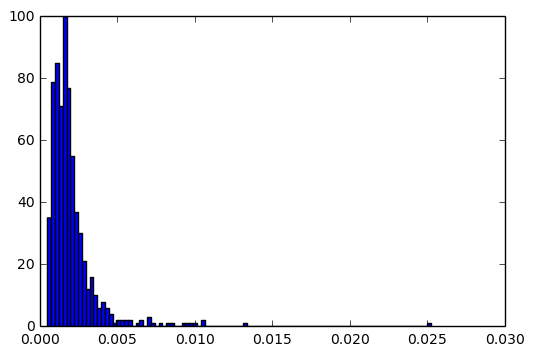

In [13]:
plt.hist(all_d['test'], 100)

In [14]:
np.savez('l_emd_hist_test', all_d['test'])

In [ ]:
if save_res:
    if do_jsd:
        f_jsd.close()
    if do_mmd:
        f_mmd.close()